In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [20]:
df = pd.read_csv('./DataSets/car_evaluation.csv', header=None)

In [21]:
df.rename(columns={i:j for i,j in zip([i for i in range(7)], ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety', 'Class'])}, inplace=True)

In [22]:
df.dtypes

Buying      object
Maint       object
Doors       object
Persons     object
Lug_boot    object
Safety      object
Class       object
dtype: object

In [23]:
df['Class'].value_counts()

Class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
ordEco = OrdinalEncoder()
x = ordEco.fit_transform(df.drop(['Class'], axis= 1))
y = ordEco.fit_transform(np.array(df['Class']).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [25]:
x_train

array([[2., 2., 3., 1., 0., 0.],
       [0., 0., 1., 2., 2., 1.],
       [1., 2., 1., 1., 1., 2.],
       ...,
       [0., 1., 3., 2., 1., 0.],
       [1., 0., 2., 0., 2., 2.],
       [2., 2., 1., 2., 2., 2.]], shape=(1209, 6))

In [26]:
x_train.shape, x_test.shape

((1209, 6), (519, 6))

In [27]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2, random_state=0)

In [28]:
tree.fit(X=x_train,y=y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [29]:
y_train_pred = tree.predict(x_train) 
y_test_pred = tree.predict(x_test)

### Evaluacion del modelo

In [32]:
# importar  metricas 
from sklearn.metrics import accuracy_score # type: ignore

# calcular el accuracy 
accuracy_score_train_tree = accuracy_score(y_train,y_train_pred)
accuracy_score_test_tree = accuracy_score(y_test, y_test_pred)

In [33]:
print(f'El accuracy en train: {accuracy_score_train_tree}')
print(f'El accuracy en train: {accuracy_score_test_tree}')

El accuracy en train: 0.7733664185277088
El accuracy en train: 0.7591522157996147


In [ ]:
# ver los features importances del modelo 
importances = tree.feature_importances_
columns = df.drop(['Class'], axis= 1).columns
importance_df = pd.DataFrame({
    'Feature': list(columns),  
    'Importance': list(importances),  
})

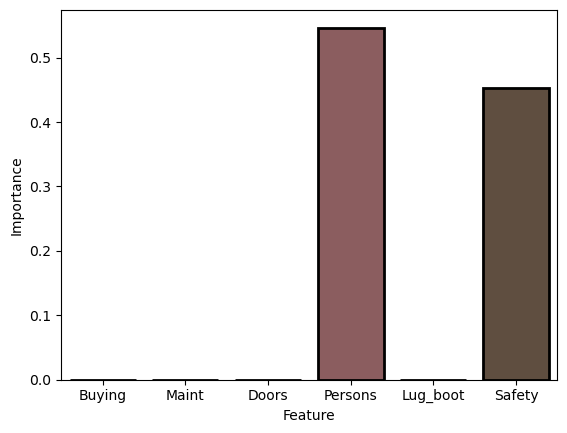

In [ ]:
sns.barplot(
    data=importance_df,
    y='Importance',
    x='Feature',
    hue='Feature', 
    palette='bright', 
    saturation=0.2,
    edgecolor= 'black',
    linewidth = 2,
    legend=False
)
plt.show()